# Location (directory) Data

### Get original data file (ccd schools universe)

navigate to [the Public Schools Universe file webpage](https://nces.ed.gov/ccd/pubschuniv.asp) <br>

alternatively, find [the pdf for the full 2009-2010 ccd here](https://nces.ed.gov/ccd/pdf/INsc90102a.pdf)

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [17]:
import gdown 
# creates error by writing extra lines on the file after downloading from google drive

#url = 'https://drive.google.com/drive/folders/1CSoQL3VQ9FpjGpFYu8N8i3HVJ8CjGmEZ'
#output = 'us_sabins_01_0910.parquet'
#gdown.download(url, output, quiet=False)

#md5 = '1gAwOuGAgip3Ktpwzi5ZD_1sTOOSdN4rA'
#gdown.cached_download(url, output, postprocess=gdown.extractall)

#sabins = gpd.read_parquet(output)

The 2009-2010 file has all of the schools universe (enrollment, locations, etc) rolled into one file.

In [2]:
locations0910 = pd.read_table('../../../data/NCES/schools/ccd_schools_universe_0910.txt', dtype={'NCESSCH': object, 'LATCOD09': object, 'LONCOD09': object})
# import combined school universe data file. We specify the type of specific variables to ensure they are not altered on importation

/home/fiendskrah/anaconda3/envs/seg_optimization/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,5,8,17,21,24,26,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Original data file only available as .txt file, so we start with pandas and create geometry later

In [5]:
locations0910.head()

,NCESSCH,FIPST,LEAID,SCHNO,STID09,SEASCH09,LEANM09,SCHNAM09,PHONE09,MSTREE09,MCITY09,MSTATE09,MZIP09,MZIP409,LSTREE09,LCITY09,LSTATE09,LZIP09,LZIP409,TYPE09,STATUS09,ULOCAL09,LATCOD09,LONCOD09,CONUM09,CONAME09,CDCODE09,FTE09,GSLO09,GSHI09,LEVEL09,TITLEI09,STITLI09,MAGNET09,CHARTR09,SHARED09,BIES09,FRELCH09,REDLCH09,TOTFRL09,RACECAT09,PK09,AMPKM09,AMPKF09,ASPKM09,ASPKF09,HIPKM09,HIPKF09,BLPKM09,BLPKF09,WHPKM09,WHPKF09,HPPKM09,HPPKF09,TRPKM09,TRPKF09,KG09,AMKGM09,AMKGF09,ASKGM09,ASKGF09,HIKGM09,HIKGF09,BLKGM09,BLKGF09,WHKGM09,WHKGF09,HPKGM09,HPKGF09,TRKGM09,TRKGF09,G0109,AM01M09,AM01F09,AS01M09,AS01F09,HI01M09,HI01F09,BL01M09,BL01F09,WH01M09,WH01F09,HP01M09,HP01F09,TR01M09,TR01F09,G0209,AM02M09,AM02F09,AS02M09,AS02F09,HI02M09,HI02F09,BL02M09,BL02F09,WH02M09,WH02F09,HP02M09,HP02F09,TR02M09,...,TR08M09,TR08F09,G0909,AM09M09,AM09F09,AS09M09,AS09F09,HI09M09,HI09F09,BL09M09,BL09F09,WH09M09,WH09F09,HP09M09,HP09F09,TR09M09,TR09F09,G1009,AM10M09,AM10F09,AS10M09,AS10F09,HI10M09,HI10F09,BL10M09,BL10F09,WH10M09,WH10F09,HP10M09,HP10F09,TR10M09,TR10F09,G1109,AM11M09,AM11F09,AS11M09,AS11F09,HI11M09,HI11F09,BL11M09,BL11F09,WH11M09,WH11F09,HP11M09,HP11F09,TR11M09,TR11F09,G1209,AM12M09,AM12F09,AS12M09,AS12F09,HI12M09,HI12F09,BL12M09,BL12F09,WH12M09,WH12F09,HP12M09,HP12F09,TR12M09,TR12F09,UG09,AMUGM09,AMUGF09,ASUGM09,ASUGF09,HIUGM09,HIUGF09,BLUGM09,BLUGF09,WHUGM09,WHUGF09,HPUGM09,HPUGF09,TRUGM09,TRUGF09,MEMBER09,AM09,AMALM09,AMALF09,ASIAN09,ASALM09,ASALF09,HISP09,HIALM09,HIALF09,BLACK09,BLALM09,BLALF09,WHITE09,WHALM09,WHALF09,PACIFIC09,HPALM09,HPALF09,TR09,TRALM09,TRALF09,TOTETH09
0,010000200277,1,100002,277,210,20,ALABAMA YOUTH SERVICES,SEQUOYAH SCH - CHALKVILLE CAMPUS,2056808574,P O BOX 9486,BIRMINGHAM,AL,35220,486.0,RT 2 OLD SPRINGVILLE RD,PINSON,AL,36126,486.0,4,1,41,33.699128,-86.606673,1073,JEFFERSON COUNTY,106,0.0,07,12,3,N,N,M,N,M,2,-2,-2,-2,5,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,0
1,010000201402,1,100002,1402,210,25,ALABAMA YOUTH SERVICES,EUFAULA SCH - EUFAULA CAMPUS,3346874441,315 OUTBACK ROAD,CLAYTON,AL,36016,NaN,315 OUTBACK RD,CLAYTON,AL,36016,NaN,4,1,42,31.879475,-85.247080,1005,BARBOUR COUNTY,102,0.0,03,12,4,N,N,M,N,M,2,-2,-2,-2,5,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,0
2,010000201667,1,100002,1667,210,50,ALABAMA YOUTH SERVICES,CAMPS,3342153850,P O BOX 66,MT MEIGS,AL,36057,NaN,M,MT MEIGS,AL,36057,NaN,4,1,41,32.387825,-86.100736,1101,MONTGOMERY COUNTY,103,0.0,07,12,3,N,N,M,N,M,2,-2,-2,-2,5,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,0
3,010000201670,1,100002,1670,210,60,ALABAMA YOUTH SERVICES,DET CTR,3342153850,P O BOX 66,MT MEIGS,AL,36057,NaN,M,MT MEIGS,AL,36057,NaN,4,1,41,32.387740,-86.100481,1101,MONTGOMERY COUNTY,103,0.0,07,12,3,N,N,M,N,M,2,-2,-2,-2,5,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,

These first 41 columns are effectively the equivalent to the 'directory' file in later data years. Here you find addresses, charter/magnet status, administrative variables like NCESSCH codes and other indicators not used in our analyses. The rest of the columns are for enrollment variables. 

In [19]:
locations0910.columns[0:41]

Index(['NCESSCH', 'FIPST', 'LEAID', 'SCHNO', 'STID09', 'SEASCH09', 'LEANM09',
       'SCHNAM09', 'PHONE09', 'MSTREE09', 'MCITY09', 'MSTATE09', 'MZIP09',
       'MZIP409', 'LSTREE09', 'LCITY09', 'LSTATE09', 'LZIP09', 'LZIP409',
       'TYPE09', 'STATUS09', 'ULOCAL09', 'LATCOD09', 'LONCOD09', 'CONUM09',
       'CONAME09', 'CDCODE09', 'FTE09', 'GSLO09', 'GSHI09', 'LEVEL09',
       'TITLEI09', 'STITLI09', 'MAGNET09', 'CHARTR09', 'SHARED09', 'BIES09',
       'FRELCH09', 'REDLCH09', 'TOTFRL09', 'RACECAT09'],
      dtype='object')

select by state

In [20]:
ca0910 = locations0910.loc[locations0910['MSTATE09'] == 'CA']

In [21]:
ca0910 = gpd.GeoDataFrame(ca0910, geometry=gpd.points_from_xy(ca0910.LONCOD09, ca0910.LATCOD09)) 
# creating geometry from lat/lon

<AxesSubplot:>

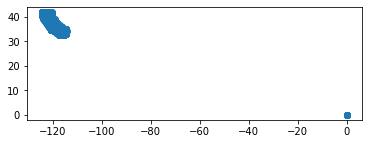

In [22]:
ca.plot()

The data is not without some issues, that far dot is probably some administrative office not represented by a physical school location (hence living at 0,0).

Let's now select by county

In [23]:
sd0910 = ca0910.loc[ca0910['CONAME09'] == 'SAN DIEGO COUNTY']

In [26]:
sd0910.shape # 755 shcools in the county

(755, 290)

<AxesSubplot:>

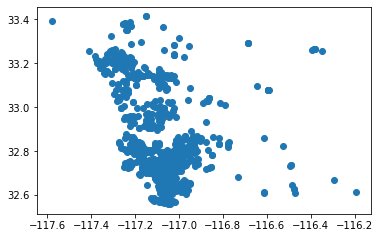

In [25]:
sd0910.plot()

### Let's do the same indexing for data year 1516

In [3]:
location1516 = gpd.read_parquet('../../../data/NCES/schools/edge_school_locations1516.parquet')

In [30]:
location1516.head()

,NCESSCH,NAME,OPSTFIPS,LSTREE,LCITY,LSTATE,LZIP,LZIP4,STFIP15,CNTY15,NMCNTY15,LOCALE15,LAT1516,LON1516,CBSA15,NMCBSA15,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15,geometry
0,010000200277,Sequoyah Sch - Chalkville Campus,01,1000 Industrial School Road,Birmingham,AL,35220,M,01,01073,Jefferson County,21,33.673661,-86.628755,13820,"Birmingham-Hoover, AL",1,142,"Birmingham-Hoover-Talladega, AL",N,N,0106,044,020,POINT (-86.62875 33.67366)
1,010000201667,Camps,01,1601 County Rd. 57,Prattville,AL,36067,M,01,01001,Autauga County,41,32.521681,-86.530132,33860,"Montgomery, AL",1,N,N,N,N,0102,042,030,POINT (-86.53013 32.52168)
2,010000201670,Det Ctr,01,2109 Bashi Rd Bldg 509,Thomasville,AL,36784,M,01,01025,Clarke County,41,31.938444,-87.750529,N,N,N,N,N,N,N,0107,068,024,POINT (-87.75053 31.93844)
3,010000201705,Wallace Sch - Mt Meigs Campus,01,1000 Industrial School Road,Mount Meigs,AL,36057,M,01,01101,Montgomery County,41,32.374812,-86.082360,33860,"Montgomery, AL",1,N,N,N,N,0103,075,025,POINT (-86.08236 32.37481)
4,010000201706,McNeel Sch - Vacca Campus,01,8950 Roebuck Blvd,Birmingham,AL,35206,M,01,01073,Jefferson County,12,33.583385,-86.710058,13820,"Birmingham-Hoover, AL",1,142,"Birmingham-Hoover-Talladega, AL",N,N,0107,058,020,POINT (-86.71006 33.58338)


Index to California 

In [33]:
ca1516 = location1516.loc[location1516['LSTATE'] == 'CA']

<AxesSubplot:>

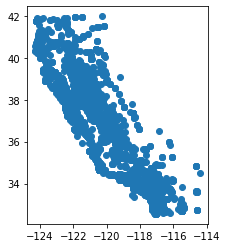

In [40]:
ca1516.plot()

Index now to San Diego County

In [36]:
sd1516 = ca1516.loc[ca1516['NMCNTY15'] == 'San Diego County']

In [38]:
sd1516.shape # 767 schools in san diego county

(767, 25)

<AxesSubplot:>

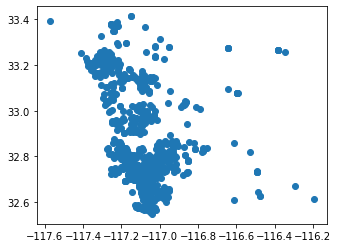

In [39]:
sd1516.plot()